# Телеком — задача проекта

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

## Описание данных

**Таблица contract (информация о договорах):**

- *customerID* - код клиента
- *BeginDate* - дата заключения договора
- *EndDate* - дата закрытия договора
- *Type* - тип договора
- *PaperlessBilling* - безбумажное выставление счетов
- *PaymentMethod* - способ оплаты
- *MonthlyCharges* - ежемесячный платеж
- *TotalCharges* - все платежи

**Таблица internet (информация об услуге интернет):**

- *customerID* - код клиента
- *InternetService* - тип подключения
- *OnlineSecurity* - блокировка небезопасных сайтов 
- *OnlineBackup* - Облачное хранилище файлов для резервного копирования данных 
- *DeviceProtection* - антивирус
- *TechSupport* - Выделенная линия технической поддержки
- *StreamingTV* - Стриминговое телевидение
- *StreamingMovies* - Каталог фильмов

**Таблица phone (информация об услуге телефонии):**

- *customerID* - код клиента
- *MultipleLines* - несколько линий 

**Таблица personal (информация о клиенте):**

- *customerID* - код клиента
- *gender* - пол клиента
- *SeniorCitizen* - наличие пенсии
- *Partner* - наличие партнера у  клиента
- *Dependents* - наличие иждивенцев у  клиента

## Описание услуг

Оператор предоставляет два основных типа услуг: 

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).  

Также доступны такие услуги:

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

## План

**1. Исследовательский анализ данных**
- просмотр данных
- определение типов данных
- обнаружение дубликатов 
- обнаружение пропущенных значений
- выявление аномалий и закономерностей
- исследование оттока клиентов
- написание вывода

**2. Подготовка данных для обучения**

- заполнение пропущенных значений
- приведение к необходимому типу данных 
- кодирование данных
- масштабирование данных 
- разделение данных на выборки 
- написание вывода

**3. Обучение модели**

- создание нескольких моделей классификации
- подбор параметров
- тестирование модели
- написание вывода

**4. Итоговой вывод**

# 1. Исследовательский анализ данных 

На данном этапе изучим предоставленные данные. Посмотрим пропущенные значения и типы данных. Также исследуем причины оттока клиентов. Выясним почему клиенты уходят.

Импортируем для начала основные библиотеки.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier 
from sklearn import svm
import warnings
warnings.filterwarnings('ignore')
import time
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
!pip install lightgbm

You should consider upgrading via the 'c:\miniconda\python.exe -m pip install --upgrade pip' command.


Прочитаем и изучим датасеты.

In [3]:
contract = pd.read_csv('contract.csv')

In [4]:
internet = pd.read_csv('internet.csv')

In [5]:
personal = pd.read_csv('personal.csv')

In [6]:
phone = pd.read_csv('phone.csv')

In [7]:
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [8]:
internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [9]:
personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [10]:
phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


Изучим общую информацию о данных.

In [11]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


Столбец TotalCharges с типом данных object необходимо привести к float64. 

Изучим информацию о таблице internet.

In [12]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


Пропущенных значений нет, типы данных соответствуют. Изучим информацию о таблице personal.

In [13]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


Пропущенных значений нет, типы данных соответствуют. Изучим информацию о таблице phone.

In [14]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


Пропущенных значений нет, типы данных соответствуют.

## Исследование оттока клиентов.

Сравним распределения величин ежемесячных платежей (MonthlyCharges) всех клиентов и тех, кто ушёл.

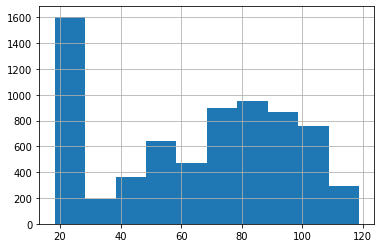

In [15]:
contract['MonthlyCharges'].hist()
plt.show()

По графику видно, что большая часть клиентов пользуется выгодным тарифом. Посмотрим распределение всех платежей.

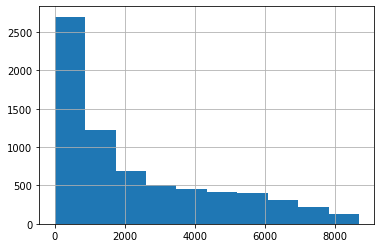

In [84]:
contract['TotalCharges'].hist()
plt.show()

По распределению обнаруживаем, что у телеоператора много новых клиентов. Изучим распределение ушедших клиентов.

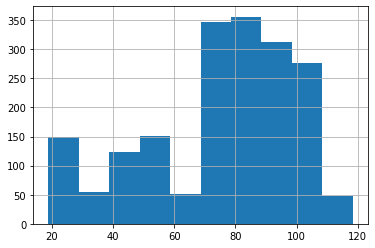

In [17]:
contract[contract['EndDate']!='No']['MonthlyCharges'].hist()
plt.show()

По распределению ушедших клиентов видно, что график смещен влево. Ушедшие клиенты хорошо платили. Потвердим данные статистикой.

In [18]:
print("Описание данных всех клиентов")
print(contract['MonthlyCharges'].describe())
print("")
print("Описание данных ушедших клиентов")
print(contract[contract['EndDate']!='No']['MonthlyCharges'].describe())

Описание данных всех клиентов
count   7043.00
mean      64.76
std       30.09
min       18.25
25%       35.50
50%       70.35
75%       89.85
max      118.75
Name: MonthlyCharges, dtype: float64

Описание данных ушедших клиентов
count   1869.00
mean      74.44
std       24.67
min       18.85
25%       56.15
50%       79.65
75%       94.20
max      118.35
Name: MonthlyCharges, dtype: float64


Видим, что медиана и среднее у ушедших клиентов больше. Сравним поведение клиентов этих двух групп. Посмотрим долю пользователей телефонной связи.Объединим таблицы contract и internet.

In [19]:
contract_internet = contract.merge(internet, on='customerID')

Посмотрим ежемесячные расходы клиентов на интернет всех клиентов.

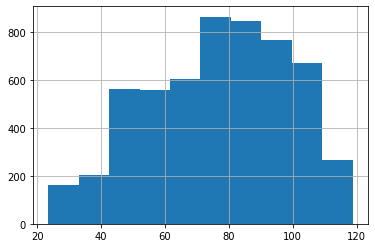

In [20]:
contract_internet['MonthlyCharges'].hist()
plt.show()

Посмотрим ежемесячные расходы клиентов на интернет ушедших клиентов.

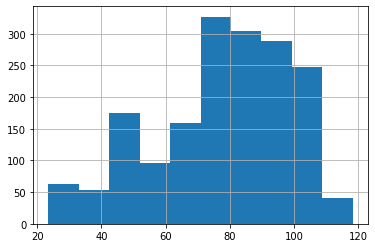

In [21]:
contract_internet[contract_internet['EndDate']!='No']['MonthlyCharges'].hist()
plt.show()

Распределение у графиков нормальное. Графики схожи. Изучим статистику.

In [22]:
print("Описание данных всех клиентов")
print(contract_internet['MonthlyCharges'].describe())
print("")
print("Описание данных ушедших клиентов")
print(contract_internet[contract_internet['EndDate']!='No']['MonthlyCharges'].describe())

Описание данных всех клиентов
count   5517.00
mean      76.84
std       21.92
min       23.45
25%       59.95
50%       79.45
75%       94.45
max      118.75
Name: MonthlyCharges, dtype: float64

Описание данных ушедших клиентов
count   1756.00
mean      77.92
std       21.14
min       23.45
25%       69.35
50%       80.45
75%       94.65
max      118.35
Name: MonthlyCharges, dtype: float64


Медиана и среднее значение у всех клиентов и ушедших клиентов почти одинаковы. Значит уход клиентов скорее всего не связан с услугой интернет. Изучим поведение пользователей телефонной связи. Объединим таблицы contract и phone.

In [23]:
contract_phone = contract.merge(phone, on='customerID')

Посмотрим ежемесячные расходы клиентов на телефонию всех клиентов.

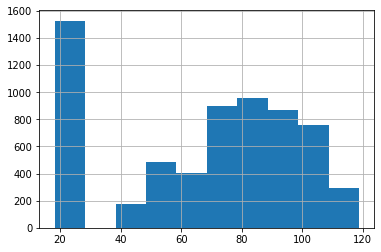

In [24]:
contract_phone['MonthlyCharges'].hist()
plt.show()

Посмотрим ежемесячные расходы клиентов на телефонию ушедших клиентов.

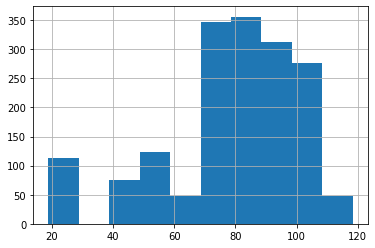

In [25]:
contract_phone[contract_phone['EndDate']!='No']['MonthlyCharges'].hist()
plt.show()

По распределению услуг телефонии видно,что 
- у ушедших клиентов ежемесячный платеж больше, по сравнению со всеми
- у многих клиентов низкий платеж
- пришло много новых клиентов

Потвердим данные статистикой.

In [26]:
print("Описание данных всех клиентов")
print(contract_phone['MonthlyCharges'].describe())
print("")
print("Описание данных ушедших клиентов")
print(contract_phone[contract_phone['EndDate']!='No']['MonthlyCharges'].describe())

Описание данных всех клиентов
count   6361.00
mean      67.20
std       30.45
min       18.25
25%       44.75
50%       74.70
75%       91.25
max      118.75
Name: MonthlyCharges, dtype: float64

Описание данных ушедших клиентов
count   1699.00
mean      78.13
std       22.57
min       18.85
25%       69.97
50%       80.95
75%       94.85
max      118.35
Name: MonthlyCharges, dtype: float64


Также видим, что медиана и среднее значение у ушедших клиентов выше по сравнению со всеми клиентами.

## Вывод

На этапе исследовательского анализа данных:
- Изучили данные
- Изучили пропущенные значения
- Определили типы данных.


Выявили, что 
- у ушедших клиентов ежемесячный платеж больше, по сравнению с остальными клиентами
- пришло много новых клиентов с низким ежемесячным платежем
- на услугу телефонии ежемесячный платеж вырос у постоянных клиентов

Отток клиентов связан скорее всего с подорожанием услуги телефонии для постоянных клиентов. 
Возможно необходимо предложить постоянным клиентам промокоды и специальные условия на услугу телефонии.

# 2. Подготовка данных

На данном этапе подготовим данные для обучения моделей.  Приведем тип данных к float в столбце TotalCharges. Для этого сначала удалим лишние пробелы в таблице.

In [27]:
contract = contract.replace(r'^\s*$', np.nan, regex=True)

Теперь Приведем тип данных к float в столбце TotalCharges.

In [28]:
contract['TotalCharges'] = contract['TotalCharges'].astype('float64')

Проверим информацию о таблице.

In [29]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7032 non-null   float64
dtypes: float64(2), object(6)
memory usage: 440.3+ KB


Видим, что в столбце TotalCharges появились пропуски. Изучим пропущенные значения.

In [30]:
contract[contract['TotalCharges'].isnull()]

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,NaN
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,NaN
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,NaN
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,NaN
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,NaN
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,NaN
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,NaN
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,NaN
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,NaN


Пропущенные значения связаны с тем, что клиенты заключили договор 1 февраля 2020 и пока ничего не оплачивали. Пропуски необходимо заменить на 0.

In [31]:
contract['TotalCharges'].fillna(0, inplace=True)

Объединим всe таблицы в единую.

In [32]:
contract_internet= contract.merge(internet, on='customerID', how='left')

In [33]:
contract_internet_phone= contract_internet.merge(phone, on='customerID', how='left')

In [34]:
df= contract_internet_phone.merge(personal, on='customerID', how='left')

Изучим общую информацию.

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   float64
 8   InternetService   5517 non-null   object 
 9   OnlineSecurity    5517 non-null   object 
 10  OnlineBackup      5517 non-null   object 
 11  DeviceProtection  5517 non-null   object 
 12  TechSupport       5517 non-null   object 
 13  StreamingTV       5517 non-null   object 
 14  StreamingMovies   5517 non-null   object 
 15  MultipleLines     6361 non-null   object 
 16  gender            7043 non-null   object 


Полученные пропуски связаны с тем, что клиенты не пользуются данными услугами. Пропуски в столбцах нужно заменить на 'No'.

In [36]:
df['InternetService'].fillna('No', inplace=True)
df['OnlineSecurity'].fillna('No', inplace=True)
df['OnlineBackup'].fillna('No', inplace=True)
df['DeviceProtection'].fillna('No', inplace=True)
df['TechSupport'].fillna('No', inplace=True)
df['StreamingTV'].fillna('No', inplace=True)
df['StreamingMovies'].fillna('No', inplace=True)
df['MultipleLines'].fillna('No', inplace=True)

Добавим новый признак - Факт расторжения договора.

In [37]:
def target(value):
    if value=='No':
        return 0
    else:
        return 1
df['Exited']=df['EndDate'].apply(target)

Добавим новый признак - Срок действия договора.

In [38]:
def data(value):
    if value!='No':
        return value
    else:
        return '2020-02-01'
df['EndDate']=df['EndDate'].apply(data)


In [39]:
df['BeginDate'] = pd.to_datetime(df['BeginDate'], format='%Y-%m-%d')
df['EndDate'] = pd.to_datetime(df['EndDate'], format='%Y-%m-%d')
df['Term_Contract'] = df['EndDate'] - df['BeginDate']
df['Term_Contract'] = pd.to_numeric(df['Term_Contract'].dt.days, downcast='integer')

In [40]:
df.head(20)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,MultipleLines,gender,SeniorCitizen,Partner,Dependents,Exited,Term_Contract
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,...,No,No,No,No,Female,0,Yes,No,0,31
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,1889.50,DSL,Yes,...,No,No,No,No,Male,0,No,No,0,1036
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,...,No,No,No,No,Male,0,No,No,1,61
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,...,Yes,No,No,No,Male,0,No,No,0,1371
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,...,No,No,No,No,Female,0,No,No,1,61
5,9305-CDSKC,2019-03-01,2019-11-01,Month-to-month,Yes,Electronic check,99.65,820.50,Fiber optic,No,...,No,Yes,Yes,Yes,Female,0,No,No,1,245
6,1452-KIOVK,2018-04-01,2020-02-01,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,Fiber optic,No,...,No,Yes,No,Yes,Male,0,No,Yes,0,671
7,6713-OKOMC,2019-04-01,2020-02-01,Month-to-month,No,Mailed check,29.75,301.90,DSL,Yes,...,No,No,No,No,Female,0,No,No,0,306
8,7892-POOKP,2017-07-01,2019-11-01,Month-to-month,Yes,Electronic check,104.80,3046.05,Fiber optic,No,...,Yes,Yes,Yes,Yes,Female,0,Yes,No,1,853
9,6388-TABGU,2014-12-01,2020-02-01,One year,No,Bank transfer (automatic),56.15,3487.95,DSL,Yes,...,No,No,No,No,Male,0,No,Yes,0,1888


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   InternetService   7043 non-null   object        
 9   OnlineSecurity    7043 non-null   object        
 10  OnlineBackup      7043 non-null   object        
 11  DeviceProtection  7043 non-null   object        
 12  TechSupport       7043 non-null   object        
 13  StreamingTV       7043 non-null   object        
 14  StreamingMovies   7043 n

Удалим ненужные столбцы для обучения.

In [42]:
df = df.drop(['EndDate', 'BeginDate','MonthlyCharges'], axis=1)

Определим список бинарных столбцов.

In [43]:
binar_сol= ['PaperlessBilling', 'Partner', 'Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']

Заменим значения на численные для подготовки данных к кодированию.

In [44]:
def binar(value):
    if value == "Yes":
        return 1
    if value == "No":
        return 0
        
        
for columns in binar_сol:
    df[columns]= df[columns].apply(binar)

Определим категориальные переменные, чтобы их закодировать.

In [45]:
category = ['customerID','Type','PaymentMethod','InternetService','gender']

Закодируем данные.

In [46]:
data_ohe = pd.get_dummies(df[category], drop_first=True)

Удалим из таблицы категориальные переменные.

In [48]:
df = df.drop(df[category], axis=1)

Объединим закодированные данные с остальной таблицей.

In [49]:
data = df.join(data_ohe)

In [50]:
data

,PaperlessBilling,TotalCharges,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,SeniorCitizen,...,customerID_9993-LHIEB,customerID_9995-HOTOH,Type_One year,Type_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,gender_Male
0,1,29.85,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,1889.50,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
2,1,108.15,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,1840.75,1,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,1,151.65,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1990.50,1,0,1,1,1,1,1,0,...,0,0,1,0,0,0,1,0,0,1
7039,1,7362.90,0,1,1,0,1,1,1,0,...,0,0,1,0,1,0,0,1,0,0
7040,1,346.45,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7041,1,306.60,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,1,1,0,1


Определим признаки и целевой признак.

In [51]:
features = data.drop(['Exited'], axis=1)
target = data['Exited'] 

Разделим данные на обучающую и тестовую выборки.

In [52]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.2, random_state=12345)

Определим численные столбцы.

In [53]:
numeric = ['Term_Contract','TotalCharges']

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Columns: 7064 entries, PaperlessBilling to gender_Male
dtypes: float64(1), int16(1), int64(12), uint8(7050)
memory usage: 48.4 MB


Масштабируем численные значения.

In [55]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

Обучим модель дерева решений. Посчитаем значение accuracy и auc_roc на валидационной выборке.

In [56]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train, target_train)
predictions_test = model.predict(features_test)
probabilities_test= model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
test_accuracy = accuracy_score(target_test, predictions_test)
print(test_accuracy,"- accuracy модели DecisionTreeClassifier на тестовой выборке")
auc_roc_test = roc_auc_score(target_test, predictions_test)
print(auc_roc_test, "- ROC-AUC модели DecisionTreeClassifier на тестовой выборке")

0.8097941802696949 - accuracy модели DecisionTreeClassifier на тестовой выборке
0.7306542510951148 - ROC-AUC модели DecisionTreeClassifier на тестовой выборке


Чтобы оценить адекватность модели, проверим, как часто в целевом признаке встречается класс «1» или «0». Количество уникальных значений подсчитывается методом value_counts(). Он группирует строго одинаковые величины.

0   0.73
1   0.27
Name: Exited, dtype: float64


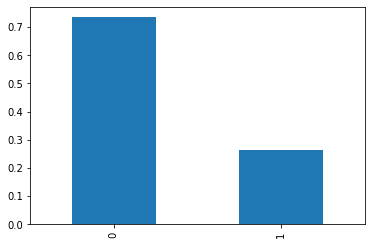

In [57]:
class_frequency = data['Exited'].value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')
plt.show()

Узнаем из данных, что 27 % клиентов ушли от оператора. Проанализируем частоты классов в результатах предсказаний решающего дерева.

0   0.78
1   0.22
dtype: float64


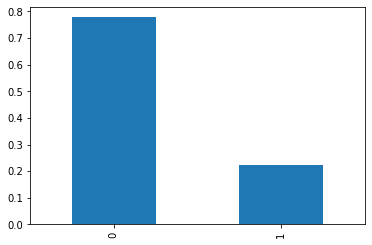

In [58]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train, target_train)
predicted = pd.Series(model.predict(features_test))
class_frequency = predicted.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')
plt.show()

Данные немного изменились. Создадим константную модель: любому объекту она прогнозирует класс «0». Сохраним её предсказания в переменной target_pred_constant. Напечатаем на экране значение accuracy и roc_auc.

In [59]:
target_pred_constant = pd.Series ([0] * len(target)) 
accuracy = accuracy_score(target, target_pred_constant)
roc_auc = roc_auc_score(target, target_pred_constant)
print(accuracy, "- accuracy константной модели") 
print(roc_auc, "- ROC-AUC константной модели")

0.7346301292063041 - accuracy константной модели
0.5 - ROC-AUC константной модели


Классы несбалансированны, когда их соотношение далеко от 1:1. Баланс классов наблюдается, если их количество примерно равно. Увеличим выборку модели случайного леса с помощью функции upsample для борьбы с дисбалансом. Посмотрим улучшится ли метрика auc_roc.

In [60]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 10)

model= DecisionTreeClassifier(random_state=12345,class_weight='balanced')
model.fit(features_upsampled, target_upsampled)
probabilities_train= model.predict_proba(features_train)
probabilities_one_test = probabilities_train[:, 1]
probabilities_test= model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)
accuracy = accuracy_score(target_test, probabilities_one_test)
print("accuracy",accuracy)
print("auc_roc",auc_roc)


accuracy 0.7963094393186657
auc_roc 0.7506148013423163


Метрики accuracy и ROC-AUC улучшилась. Теперь уменьшим выборку модели случайного леса с помощью функции downsample для борьбы с дисбалансом. Посмотрим улучшится ли метрика auc_roc.

In [61]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.1)

model= DecisionTreeClassifier(random_state=12345, class_weight='balanced')
model.fit(features_downsampled, target_downsampled)
probabilities_test= model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)
accuracy = accuracy_score(target_test, probabilities_one_test)
print("accuracy",accuracy)
print("auc_roc",auc_roc)


accuracy 0.6486870120652946
auc_roc 0.7205189947998053


Метрики accuracy  и ROC-AUC ухудшились. То есть для борьбы с дисбалансом классов можно использовать увеличение выборки с помощью функции upsample, а также можно добавить атрибут в модель - class_weight='balanced'.

## Вывод

На этапе предобработки данных:
- привели данные к нужному типу
- заполненили пропущенные значения
- объединили таблицу
- добавили новые признаки
- удалили ненужные столбцы
- закодировали данные
- масштабировали численные значения
- определили признаки 
- разделили данные на выборки
- написали вывод 

Данные готовы. Приступим к обучению моделей. 

## Обучение моделей

На данном этапе:
- подберем наилучшие параметры для нескольких моделей
- обучим модели классификации
- проверим качество моделей с помощию метрик accuracy, ROC-AUC
- посчитаем время предсказания моделей на тестовой и обучающей выборке

Подберем параметры для модели DecisionTreeClassifier.

In [62]:
# model = DecisionTreeClassifier(random_state=12345)
# params_dtc = {'max_depth':[1,6,1]}
# DTC = GridSearchCV(model, params_dtc, cv=3)
# DTC.fit(features_train,target_train)
# print(DTC.best_params_)
# print(DTC.best_score_)

Обучим модель DecisionTreeClassifier с подобранными параметрами.

In [64]:
%%time
model = DecisionTreeClassifier(random_state=12345, max_depth=6, class_weight='balanced')
model.fit(features_train,target_train)
probabilities_test= model.predict_proba(features_test)[:, 1]
start= time.time()
predictions_test = model.predict(features_test)
end= time.time()
dtc_time_predictions_test = end - start
probabilities_train = model.predict_proba(features_train)[:, 1]
start= time.time()
predictions_train = model.predict(features_train)
end= time.time()
dtc_time_predictions_train = end - start
auc_roc_dtc_test = roc_auc_score(target_test, probabilities_test)
auc_roc_dtc_train = roc_auc_score(target_train, probabilities_train)
accuracy_dtc_test = accuracy_score(target_test, predictions_test)
accuracy_dtc_train = accuracy_score(target_train, predictions_train)

print(auc_roc_dtc_test,'- AUC ROC модели DecisionTreeClassifier на тестовой выборке')
print(auc_roc_dtc_train,'- AUC ROC модели DecisionTreeClassifier на обучающей выборке')
print(accuracy_dtc_test, '- Accuracy модели DecisionTreeClassifier на тестовой выборке')
print(accuracy_dtc_train, '- Accuracy модели DecisionTreeClassifier на обучающей выборке')
print(dtc_time_predictions_test, '- Время предсказания модели DecisionTreeClassifier на обучающей выборке')
print(dtc_time_predictions_train, '- Время предсказания модели DecisionTreeClassifier на тестовой выборке')

0.8522222506852473 - AUC ROC модели DecisionTreeClassifier на тестовой выборке
0.8733360757689617 - AUC ROC модели DecisionTreeClassifier на обучающей выборке
0.7139815471965933 - Accuracy модели DecisionTreeClassifier на тестовой выборке
0.7373091941782037 - Accuracy модели DecisionTreeClassifier на обучающей выборке
0.07779240608215332 - Время предсказания модели DecisionTreeClassifier на обучающей выборке
0.2443704605102539 - Время предсказания модели DecisionTreeClassifier на тестовой выборке
Wall time: 1.48 s


Подберем параметры для модели LogisticRegression.

In [65]:
# model = LogisticRegression(random_state=12345)
# params_lr = {'C': [0.1, 1, 10,100,1000],
#           'class_weight': ['balanced', None],
#     'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
# LR = GridSearchCV(model, params_lr, cv=3)

# LR.fit(features_train,target_train)
# print(LR.best_params_)
# print(LR.best_score_)

Обучим модель LogisticRegression с подобранными параметрами.

In [66]:
model = LogisticRegression(random_state=12345, C= 0.1, class_weight= 'balanced', solver='newton-cg')
model.fit(features_train, target_train)
probabilities_test= model.predict_proba(features_test)[:, 1]
start= time.time()
predictions_test = model.predict(features_test)
end= time.time()
lr_time_predictions_test = end - start
probabilities_train = model.predict_proba(features_train)[:, 1]
start= time.time()
predictions_train = model.predict(features_train)
end= time.time()
lr_time_predictions_train = end - start
auc_roc_lr_test = roc_auc_score(target_test, probabilities_test)
auc_roc_lr_train = roc_auc_score(target_train, probabilities_train)
accuracy_lr_test = accuracy_score(target_test, predictions_test)
accuracy_lr_train = accuracy_score(target_train, predictions_train)

print(auc_roc_lr_test,'- AUC ROC модели LogisticRegression на тестовой выборке')
print(auc_roc_lr_train,'- AUC ROC модели LogisticRegression на обучающей выборке')
print(accuracy_lr_test, '- Accuracy модели LogisticRegression на тестовой выборке')
print(accuracy_lr_train, '- Accuracy модели LogisticRegression на обучающей выборке')
print(lr_time_predictions_test, '- Время предсказания модели LogisticRegression на обучающей выборке')
print(lr_time_predictions_train, '- Время предсказания модели LogisticRegression на тестовой выборке')

0.8424033609140047 - AUC ROC модели LogisticRegression на тестовой выборке
0.8612675235158457 - AUC ROC модели LogisticRegression на обучающей выборке
0.7544357700496807 - Accuracy модели LogisticRegression на тестовой выборке
0.7641107561235356 - Accuracy модели LogisticRegression на обучающей выборке
0.07783102989196777 - Время предсказания модели LogisticRegression на обучающей выборке
0.2333669662475586 - Время предсказания модели LogisticRegression на тестовой выборке


Подберем параметры для модели RandomForestClassifier.

In [67]:
# model = RandomForestClassifier(random_state=12345)
# params_rfc = {'n_estimators':(50, 200, 25), 'max_depth': (1, 100, 10)}
# RFC = GridSearchCV(model, params_rfc, cv=3)
# RFC.fit(features_train,target_train)
# print(RFC.best_params_)
# print(RFC.best_score_)

Обучим модель RandomForestClassifier с подобранными параметрами.

In [68]:
model = RandomForestClassifier(random_state=12345, max_depth=10, n_estimators=50, class_weight= 'balanced')
model.fit(features_train, target_train)
probabilities_test= model.predict_proba(features_test)[:, 1]
start= time.time()
predictions_test = model.predict(features_test)
end= time.time()
rfc_time_predictions_test = end - start
probabilities_train = model.predict_proba(features_train)[:, 1]
start= time.time()
predictions_train = model.predict(features_train)
end= time.time()
rfc_time_predictions_train = end - start
auc_roc_rfc_test = roc_auc_score(target_test, probabilities_test)
auc_roc_rfc_train = roc_auc_score(target_train, probabilities_train)
accuracy_rfc_test = accuracy_score(target_test, predictions_test)
accuracy_rfc_train = accuracy_score(target_train, predictions_train)

print(auc_roc_rfc_test,'- AUC ROC модели RandomForestClassifier на тестовой выборке')
print(auc_roc_rfc_train,'- AUC ROC модели RandomForestClassifier на обучающей выборке')
print(accuracy_rfc_test, '- Accuracy модели RandomForestClassifier на тестовой выборке')
print(accuracy_rfc_train, '- Accuracy модели RandomForestClassifier на обучающей выборке')
print(rfc_time_predictions_test, '- Время предсказания модели RandomForestClassifier на обучающей выборке')
print(rfc_time_predictions_train, '- Время предсказания модели RandomForestClassifier на тестовой выборке')

0.8317634551835438 - AUC ROC модели RandomForestClassifier на тестовой выборке
0.855232437614988 - AUC ROC модели RandomForestClassifier на обучающей выборке
0.7530163236337828 - Accuracy модели RandomForestClassifier на тестовой выборке
0.7658856940007099 - Accuracy модели RandomForestClassifier на обучающей выборке
0.08972311019897461 - Время предсказания модели RandomForestClassifier на обучающей выборке
0.3779454231262207 - Время предсказания модели RandomForestClassifier на тестовой выборке


Подберем параметры для модели CatBoostClassifier.

In [69]:
# model = CatBoostClassifier(random_state=12345)
# params_rfc = {"iterations": [1, 101, 10],
#           "depth": [1,11,2],
#           "learning_rate": [0.03, 0.1]}
# CBC = GridSearchCV(model, params_rfc, cv=3)
# CBC.fit(features_train,target_train)
# print(CBC.best_params_)
# print(CBC.best_score_)

Обучим модель CatBoostClassifier с подобранными параметрами.

In [70]:
model = CatBoostClassifier(random_state=12345,depth= 11, iterations=101, learning_rate= 0.03)
model.fit(features_train, target_train)
probabilities_test= model.predict_proba(features_test)[:, 1]
start= time.time()
predictions_test = model.predict(features_test)
end= time.time()
cbc_time_predictions_test = end - start
probabilities_train = model.predict_proba(features_train)[:, 1]
start= time.time()
predictions_train = model.predict(features_train)
end= time.time()
cbc_time_predictions_train = end - start
auc_roc_cbc_test = roc_auc_score(target_test, probabilities_test)
auc_roc_cbc_train = roc_auc_score(target_train, probabilities_train)
accuracy_cbc_test = accuracy_score(target_test, predictions_test)
accuracy_cbc_train = accuracy_score(target_train, predictions_train)

print(auc_roc_cbc_test,'- AUC ROC модели CatBoostClassifier на тестовой выборке')
print(auc_roc_cbc_train,'- AUC ROC модели CatBoostClassifier на обучающей выборке')
print(accuracy_cbc_test, '- Accuracy модели CatBoostClassifier на тестовой выборке')
print(accuracy_cbc_train, '- Accuracy модели DecisionTreeClassifier на обучающей выборке')
print(cbc_time_predictions_test, '- Время предсказания модели CatBoostClassifier на обучающей выборке')
print(cbc_time_predictions_train, '- Время предсказания модели CatBoostClassifier на тестовой выборке')

0:	learn: 0.6746681	total: 397ms	remaining: 39.7s
1:	learn: 0.6566750	total: 547ms	remaining: 27.1s
2:	learn: 0.6415612	total: 697ms	remaining: 22.8s
3:	learn: 0.6251250	total: 855ms	remaining: 20.7s
4:	learn: 0.6093731	total: 1.02s	remaining: 19.6s
5:	learn: 0.5938532	total: 1.18s	remaining: 18.7s
6:	learn: 0.5814588	total: 1.34s	remaining: 18.1s
7:	learn: 0.5671203	total: 1.54s	remaining: 17.9s
8:	learn: 0.5562916	total: 1.72s	remaining: 17.5s
9:	learn: 0.5463449	total: 1.88s	remaining: 17.1s
10:	learn: 0.5366771	total: 1.9s	remaining: 15.6s
11:	learn: 0.5276357	total: 2.06s	remaining: 15.3s
12:	learn: 0.5184864	total: 2.21s	remaining: 15s
13:	learn: 0.5107805	total: 2.37s	remaining: 14.8s
14:	learn: 0.5048461	total: 2.4s	remaining: 13.7s
15:	learn: 0.4968585	total: 2.57s	remaining: 13.6s
16:	learn: 0.4916473	total: 2.74s	remaining: 13.5s
17:	learn: 0.4866238	total: 2.89s	remaining: 13.3s
18:	learn: 0.4812478	total: 3.04s	remaining: 13.1s
19:	learn: 0.4766883	total: 3.21s	remaining: 

Подберем параметры для модели LGBMClassifier.

In [71]:
# model = LGBMClassifier(random_state=12345)
# params_lgbm = {'learning_rate':[0.03, 0.1], 'n_estimators':(1,500,100)}
# LGBM = GridSearchCV(model, params_rfc, cv=3)
# LGBM.fit(features_train,target_train)
# print(LGBM.best_params_)
# print(LGBM.best_score_)

Обучим модель LGBMClassifier с подобранными параметрами.

In [72]:
model = LGBMClassifier(random_state=12345, class_weight= 'balanced', learning_rate=0.1, n_estimators=500)
model.fit(features_train, target_train)
probabilities_test= model.predict_proba(features_test)[:, 1]
start= time.time()
predictions_test = model.predict(features_test)
end= time.time()
lgbm_time_predictions_test = end - start
probabilities_train = model.predict_proba(features_train)[:, 1]
start= time.time()
predictions_train = model.predict(features_train)
end= time.time()
lgbm_time_predictions_train = end - start
auc_roc_lgbm_test = roc_auc_score(target_test, probabilities_test)
auc_roc_lgbm_train = roc_auc_score(target_train, probabilities_train)
accuracy_lgbm_test = accuracy_score(target_test, predictions_test)
accuracy_lgbm_train = accuracy_score(target_train, predictions_train)

print(auc_roc_lgbm_test,'- AUC ROC модели LGBMClassifier на тестовой выборке')
print(auc_roc_lgbm_train,'- AUC ROC модели LGBMClassifier на обучающей выборке')
print(accuracy_lgbm_test, '- Accuracy модели LGBMClassifier на тестовой выборке')
print(accuracy_lgbm_train, '- Accuracy модели LGBMClassifier на обучающей выборке')
print(lgbm_time_predictions_test, '- Время предсказания модели LGBMClassifier на обучающей выборке')
print(lgbm_time_predictions_train, '- Время предсказания модели LGBMClassifier на тестовой выборке')

0.9136806107026667 - AUC ROC модели LGBMClassifier на тестовой выборке
0.9990605808349098 - AUC ROC модели LGBMClassifier на обучающей выборке
0.8623136976579134 - Accuracy модели LGBMClassifier на тестовой выборке
0.978523251686191 - Accuracy модели LGBMClassifier на обучающей выборке
0.16145777702331543 - Время предсказания модели LGBMClassifier на обучающей выборке
0.6891570091247559 - Время предсказания модели LGBMClassifier на тестовой выборке


## Вывод 

На этом этапе:
- подбрали параметры для нескольких моделей
- обучили 5 моделей классификации
- проверили качество моделей с помощию метрик accuracy, ROC-AUC
- посчитали время предсказания моделей на тестовой и обучающей выборке

# 4. Итог

Соберем все метрики и показания в итоговую таблицу и изучим полученные значения.

In [82]:
results = {
    'Model' : ['RandomForestClassifier','LogisticRegression','DecisionTreeClassifier','CatBoostClassifier','LGBMClassifier'],
    'auc_roc_test' :pd.Series([ auc_roc_rfc_test, auc_roc_lr_test, auc_roc_dtc_test, auc_roc_cbc_test, auc_roc_lgbm_test]),
'auc_roc_train' :pd.Series([auc_roc_rfc_train, auc_roc_lr_train, auc_roc_dtc_train, auc_roc_cbc_train, auc_roc_lgbm_train]),
'accuracy_test' :pd.Series([accuracy_rfc_test, accuracy_lr_test, accuracy_dtc_test, accuracy_cbc_test, accuracy_lgbm_test]),
'accuracy_train' :pd.Series([accuracy_rfc_train, accuracy_lr_train, accuracy_dtc_train, accuracy_cbc_train, accuracy_lgbm_train]),
'time_predictions_test' :pd.Series([rfc_time_predictions_test, lr_time_predictions_test, dtc_time_predictions_test, cbc_time_predictions_test, lgbm_time_predictions_test]),
'time_predictions_train' :pd.Series([rfc_time_predictions_train, lr_time_predictions_train, dtc_time_predictions_train, cbc_time_predictions_train, lgbm_time_predictions_train])}
results = pd.DataFrame(data=results)

Посмотрим на результат.

In [90]:
display(results)

,Model,auc_roc_test,auc_roc_train,accuracy_test,accuracy_train,time_predictions_test,time_predictions_train
0,RandomForestClassifier,0.83,0.86,0.75,0.77,0.09,0.38
1,LogisticRegression,0.84,0.86,0.75,0.76,0.08,0.23
2,DecisionTreeClassifier,0.85,0.87,0.71,0.74,0.08,0.24
3,CatBoostClassifier,0.87,0.89,0.82,0.84,0.10,0.12
4,LGBMClassifier,0.91,1.00,0.86,0.98,0.16,0.69


- наилучший результат качества предсказания на обеих выборках у модели LGBMClassifier 
- наибольшее время предсказания у модели LGBMClassifier
- если важнее время предсказания, то посоветуем выбрать оператору модель CatBoostClassifier
- если важнее качество предсказания, то посоветуем выбрать оператору модель LGBMClassifier